In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv("Amazon.csv", parse_dates=["Date"])
df.sort_values("Date", inplace=True)
df.reset_index(drop=True, inplace=True)

In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
6150,2021-10-21,3414.250000,3440.280029,3403.000000,3435.010010,3435.010010,1881400
6151,2021-10-22,3421.000000,3429.840088,3331.300049,3335.550049,3335.550049,3133800
6152,2021-10-25,3335.000000,3347.800049,3297.699951,3320.370117,3320.370117,2226000
6153,2021-10-26,3349.510010,3416.120117,3343.979980,3376.070068,3376.070068,2693700


In [6]:
# Check for missing values
print(df.isnull().sum())

# Strategy: Forward-fill then back-fill
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


<ipython-input-6-e2110416e989>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-6-e2110416e989>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [7]:
pip install ta


  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=fb55336c09f976a12b24feeec5c7e5194498cfc17c7833ef69a19680e311bddd
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [9]:
import ta

# Simple Moving Averages (SMA)
df['SMA_20'] = ta.trend.sma_indicator(df['Close'], window=20)   # SMA_20: Average closing price over the past 20 days.
df['SMA_365'] = ta.trend.sma_indicator(df['Close'], window=365) # SMA_365: Average closing price over the past 365 days.

# Exponential Moving Averages (EMA)
# EMA_20: EMA gives more weight to recent prices (faster to react than SMA).
df['EMA_20'] = ta.trend.ema_indicator(df['Close'], window=20)

# Relative Strength Index (RSI)
# RSI: Measures the speed and change of price movements (momentum).
# Values > 70 = Overbought
# Values < 30 = Oversold
df['RSI'] = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()

# MACD
# MACD: Difference between 12-day EMA and 26-day EMA.
# MACD_signal: 9-day EMA of MACD.
# MACD_diff: MACD histogram (MACD - Signal)

macd = ta.trend.MACD(df['Close'])
df['MACD'] = macd.macd()
df['MACD_signal'] = macd.macd_signal()
df['MACD_diff'] = macd.macd_diff()

# Drop rows with NaNs (caused by rolling indicators)
df.dropna(inplace=True)


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


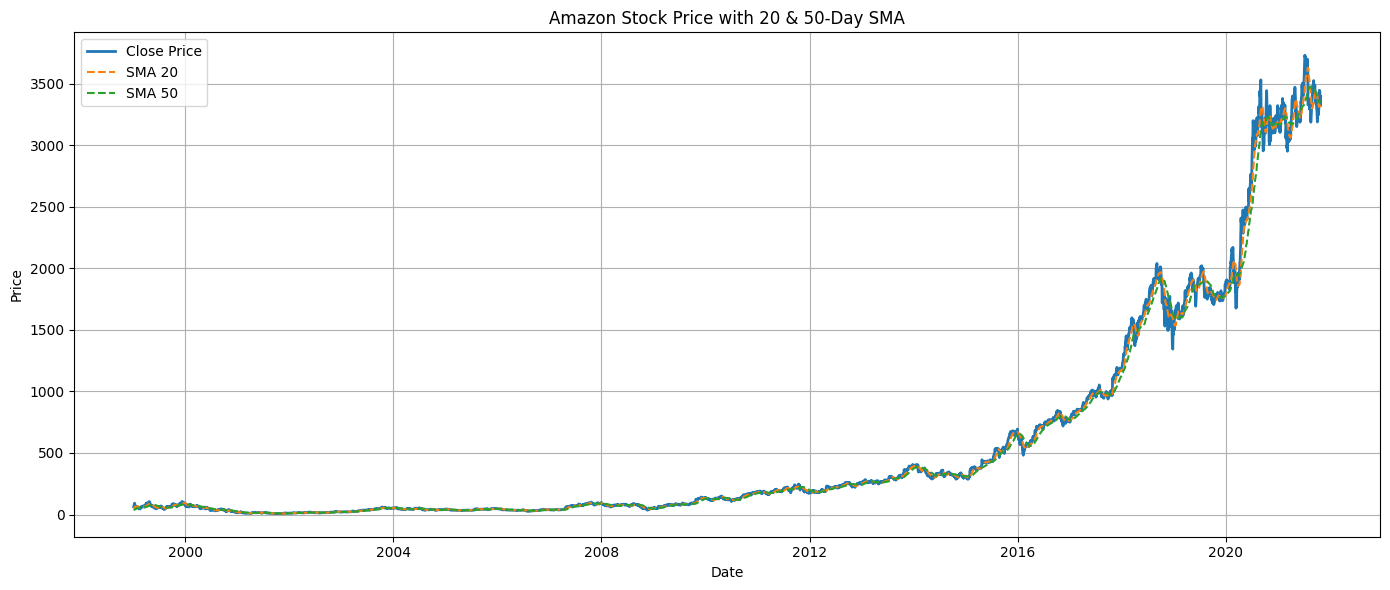

In [11]:
# Stock Price with Moving Averages

plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', linewidth=2)
plt.plot(df['Date'], df['SMA_20'], label='SMA 20', linestyle='--')
plt.plot(df['Date'], df['SMA_50'], label='SMA 50', linestyle='--')

plt.title('Amazon Stock Price with 20 & 50-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

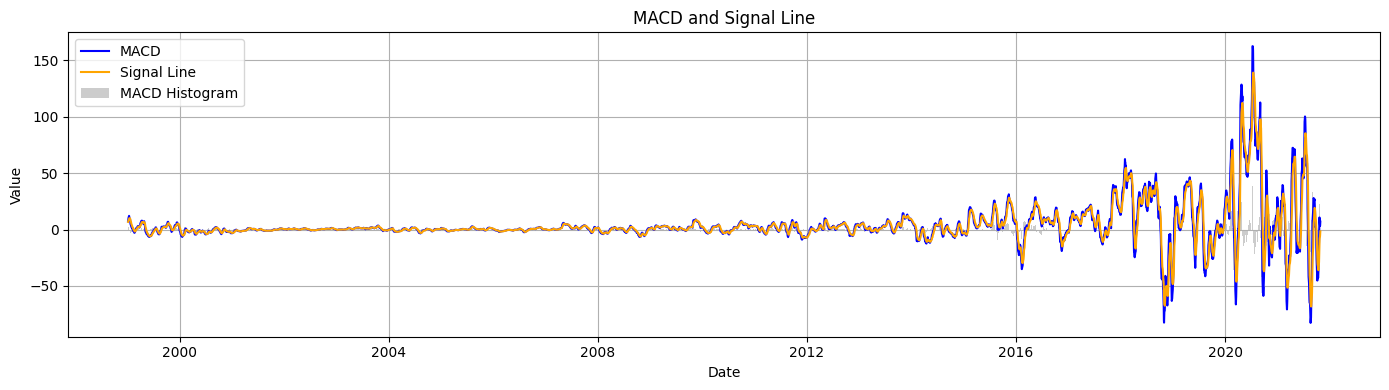

In [12]:
# MACD and Signal Line

plt.figure(figsize=(14, 4))
plt.plot(df['Date'], df['MACD'], label='MACD', color='blue')
plt.plot(df['Date'], df['MACD_signal'], label='Signal Line', color='orange')
plt.bar(df['Date'], df['MACD_diff'], label='MACD Histogram', color='gray', alpha=0.4)

plt.title('MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

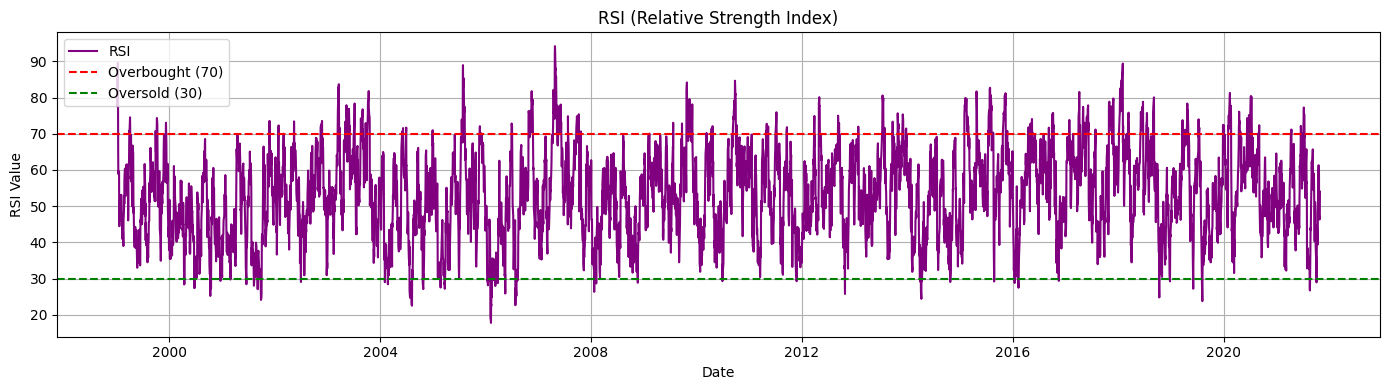

In [13]:
# RSI Relative Index Strength

plt.figure(figsize=(14, 4))
plt.plot(df['Date'], df['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')

plt.title('RSI (Relative Strength Index)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

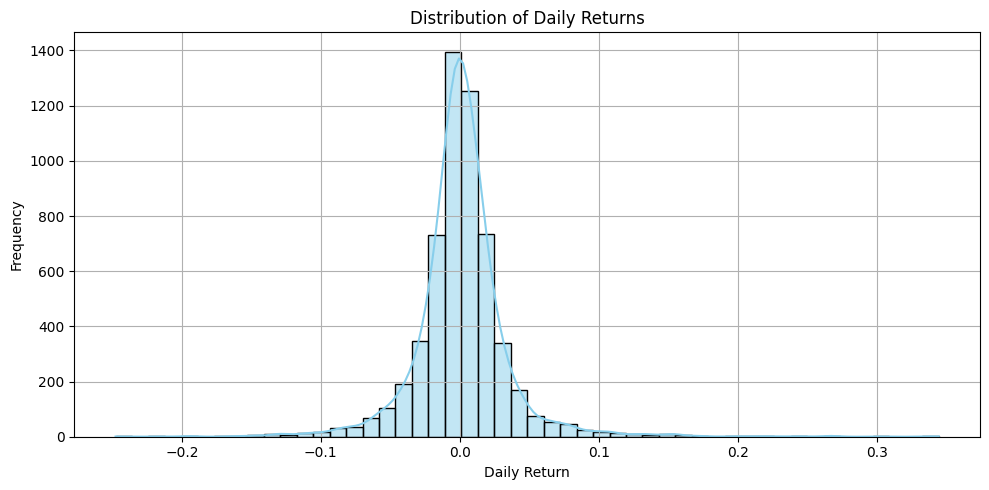

In [14]:
# Daily Returns Distribution

df['Return'] = df['Close'].pct_change()

plt.figure(figsize=(10, 5))
sns.histplot(df['Return'].dropna(), kde=True, bins=50, color='skyblue')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

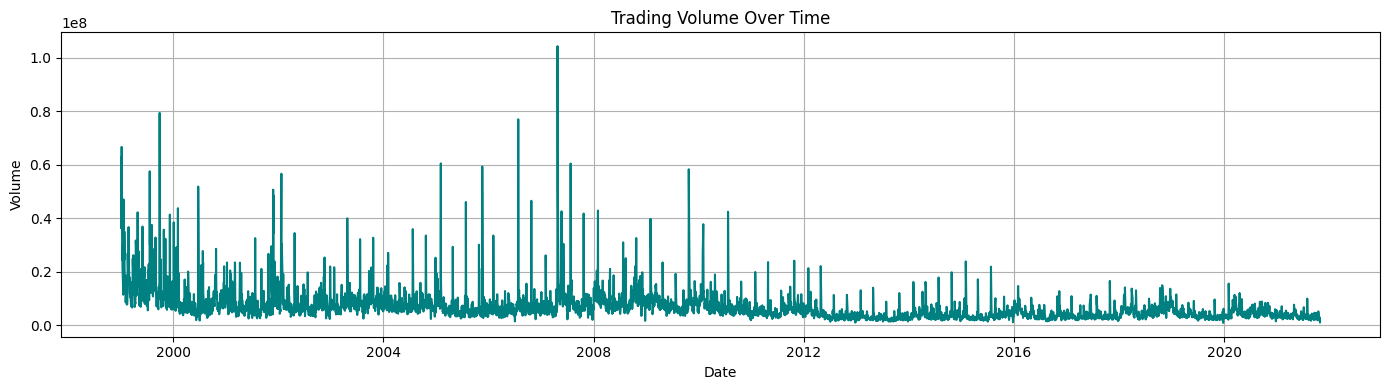

In [15]:
# Trading Volume Over Time

plt.figure(figsize=(14, 4))
plt.plot(df['Date'], df['Volume'], color='teal')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
# Predict a binary target:

# 1 if Close(t+1) > Close(t) (price goes up)

# 0 otherwise (price goes down or stays the same)

df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df.dropna(inplace=True)  # Drop last row with NaN target


In [17]:
# Train and test split

from sklearn.model_selection import train_test_split

# Features to use
features = ['SMA_20', 'SMA_50', 'EMA_20', 'RSI', 'MACD', 'MACD_signal', 'MACD_diff']
X = df[features]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [19]:
# Train Models
# 1 Logistic Regression (Baseline)

# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [20]:
#2 Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [21]:
#3 XGBoost

from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:15:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)


Logistic Regression Evaluation Metrics:
Accuracy: 0.5474325500435161
Precision: 0.5484154929577465
Recall: 0.9888888888888889
F1 Score: 0.7055492638731596
ROC AUC: 0.4836284674434963


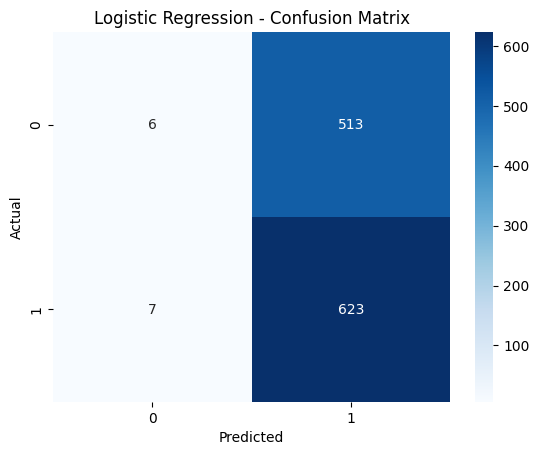

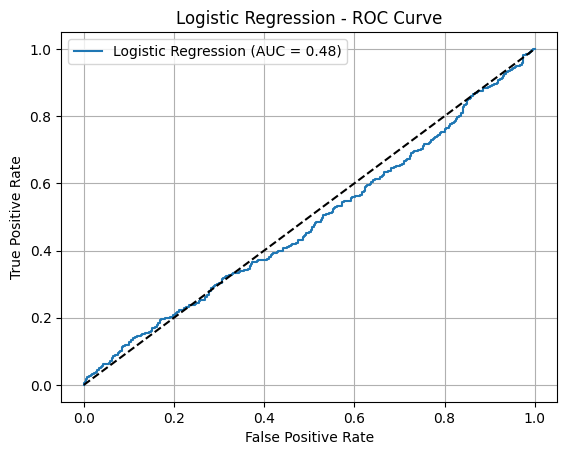


Random Forest Evaluation Metrics:
Accuracy: 0.5456919060052219
Precision: 0.5604026845637584
Recall: 0.7952380952380952
F1 Score: 0.65748031496063
ROC AUC: 0.5072820136403952


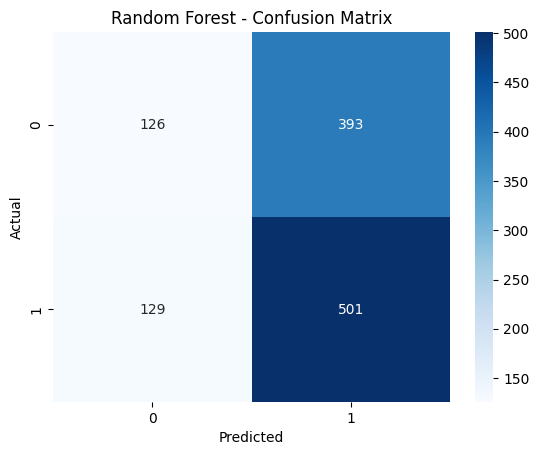

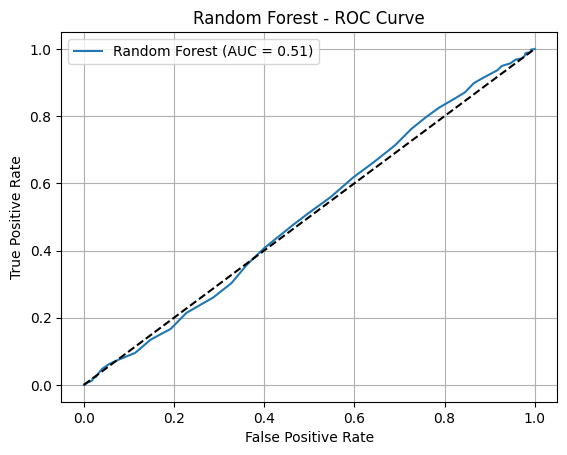


XGBoost Evaluation Metrics:
Accuracy: 0.5422106179286336
Precision: 0.5548523206751055
Recall: 0.834920634920635
F1 Score: 0.6666666666666666
ROC AUC: 0.5303284705018809


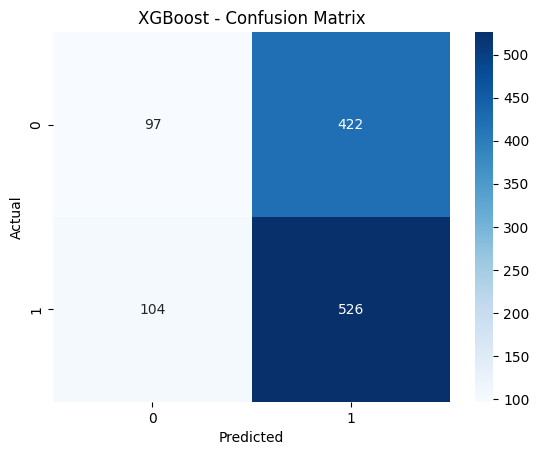

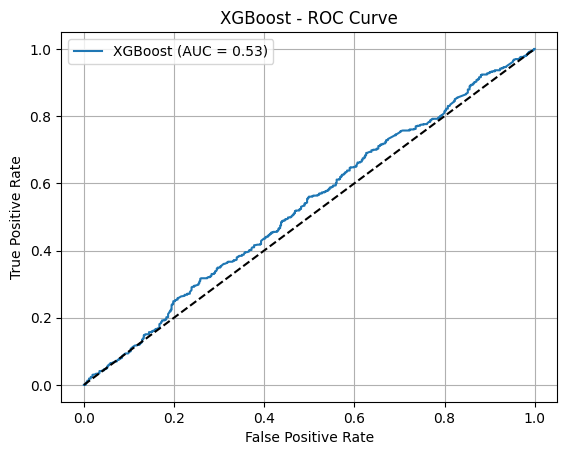

In [22]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
)

def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n{name} Evaluation Metrics:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"{name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.show()

# Evaluate all models
evaluate_model(logreg, X_test, y_test, "Logistic Regression")
evaluate_model(rf, X_test, y_test, "Random Forest")
evaluate_model(xgb, X_test, y_test, "XGBoost")


# Strategy Logic
# If model predicts 1 (up) → Buy and hold for 1 day.

# If model predicts 0 (down) → Stay in cash (no shorting for simplicity).

# Transaction cost: 0.1% per trade (i.e., 0.001).

# Slippage: 0.05% (i.e., 0.0005) assumed per transaction.

In [26]:
#Generate Predictions on Test Set

# Predict for test set
# Generate predictions for the test set
y_pred = xgb.predict(X_test)

# Create a copy of the relevant test data to track the strategy's performance
backtest = df.loc[X_test.index].copy()  # Using `loc` to ensure index alignment
backtest['Signal'] = y_pred  # 1 = Buy, 0 = No action

# Calculate daily market returns (next day's close percentage change)
backtest['Market_Return'] = backtest['Close'].pct_change().shift(-1)

# Initialize transaction cost and slippage (0.1% transaction cost, 0.05% slippage)
transaction_cost = 0.001  # 0.1% per trade
slippage = 0.0005  # 0.05% slippage

# Strategy return only when Signal is 1 (buy signal)
backtest['Strategy_Return'] = backtest['Signal'] * backtest['Market_Return']

# Apply transaction cost for signal changes (buy and sell actions)
backtest['Transaction_Cost'] = backtest['Signal'].diff().abs().fillna(0) * (transaction_cost + slippage)

# Net strategy return after considering transaction costs
backtest['Strategy_Return_net'] = backtest['Strategy_Return'] - backtest['Transaction_Cost']


In [27]:
# Calculate cumulative returns for both the market and the strategy
backtest['Cumulative_Market'] = (1 + backtest['Market_Return']).cumprod()
backtest['Cumulative_Strategy'] = (1 + backtest['Strategy_Return_net']).cumprod()


In [28]:
import numpy as np

# Sharpe ratio function
def sharpe_ratio(returns, risk_free_rate=0.0):
    excess = returns - risk_free_rate
    return np.mean(excess) / np.std(excess) * np.sqrt(252)  # Assuming 252 trading days

# Maximum drawdown function
def max_drawdown(series):
    peak = series.cummax()
    drawdown = (series - peak) / peak
    return drawdown.min()

# Calculate daily strategy returns
strategy_returns = backtest['Strategy_Return_net'].dropna()

# Performance metrics
sharpe = sharpe_ratio(strategy_returns)
drawdown = max_drawdown(backtest['Cumulative_Strategy'])
cum_return = backtest['Cumulative_Strategy'].iloc[-1] - 1

print(f"🔹 Cumulative Return: {cum_return:.2%}")
print(f"🔹 Sharpe Ratio: {sharpe:.2f}")
print(f"🔹 Max Drawdown: {drawdown:.2%}")


🔹 Cumulative Return: nan%
🔹 Sharpe Ratio: 0.93
🔹 Max Drawdown: -26.05%


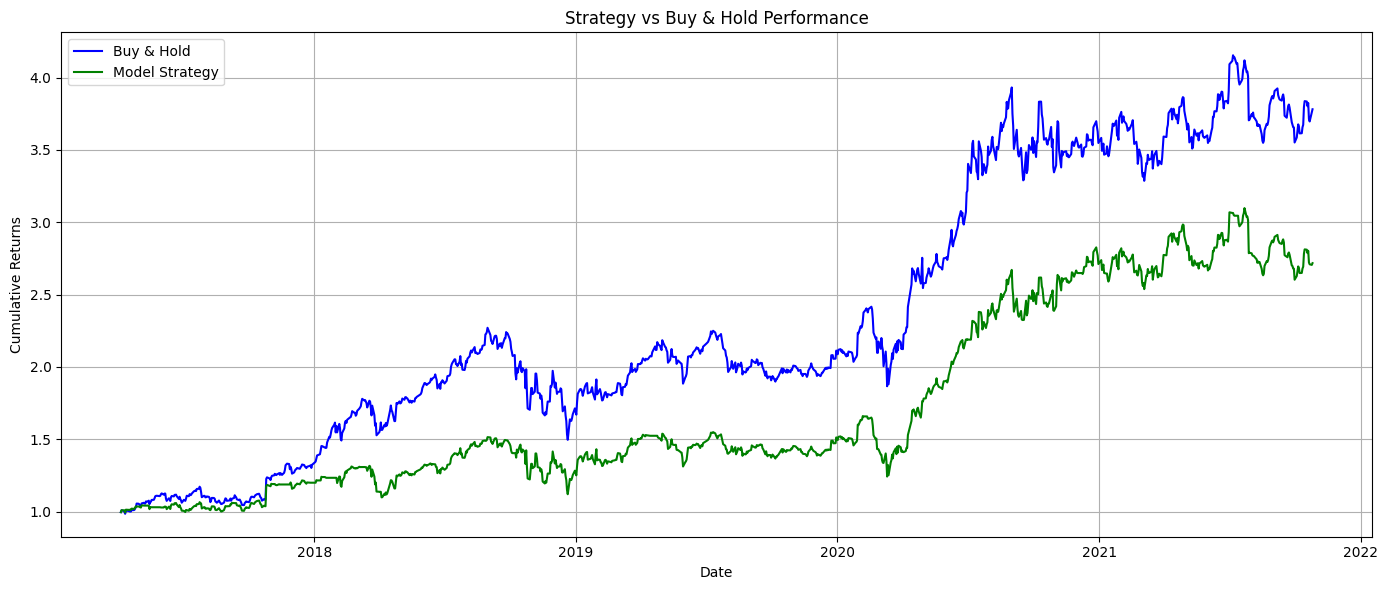

In [29]:
#   Plot Strategy vs Buy-and-Hold Performance

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(backtest['Date'], backtest['Cumulative_Market'], label='Buy & Hold', color='blue')
plt.plot(backtest['Date'], backtest['Cumulative_Strategy'], label='Model Strategy', color='green')

plt.title('Strategy vs Buy & Hold Performance')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
# Model Parameter Optimization
# We’ll use GridSearchCV or RandomizedSearchCV to find the best set of hyperparameters for the predictive model (e.g., XGBoost or Random Forest).

# 1. Hyperparameter Tuning for XGBoost

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Set parameter grid for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Perform grid search
grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                           param_grid, cv=3, n_jobs=-1, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters for XGBoost:", grid_search.best_params_)

# Best model
best_xgb = grid_search.best_estimator_


Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:44:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}


In [31]:
# 2. Hyperparameter Tuning for Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Set parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform grid search
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                              param_grid_rf, cv=3, n_jobs=-1, scoring='accuracy', verbose=1)
grid_search_rf.fit(X_train, y_train)

# Best parameters
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

# Best model
best_rf = grid_search_rf.best_estimator_


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for Random Forest: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [32]:
# Strategy Refinement (Risk Management)
# improving the trading strategy by adding risk management rules such as stop-loss and take-profit.

#  Stop-Loss and Take-Profit Logic
#  implementing a stop-loss (max loss per trade) and take-profit (max profit per trade) to limit downside risk and lock in profits.

# Define stop-loss and take-profit levels
stop_loss_pct = -0.02  # 2% stop-loss
take_profit_pct = 0.05  # 5% take-profit

# Simulate trades with risk management
backtest['Trade_Price'] = backtest['Close'].shift(1)  # Price at the time of trade execution
backtest['Stop_Loss'] = backtest['Trade_Price'] * (1 + stop_loss_pct)
backtest['Take_Profit'] = backtest['Trade_Price'] * (1 + take_profit_pct)

# Check if the market return goes beyond stop-loss or take-profit
backtest['Exited_Stop_Loss'] = backtest['Market_Return'] < stop_loss_pct
backtest['Exited_Take_Profit'] = backtest['Market_Return'] > take_profit_pct

# Apply stop-loss or take-profit conditions
backtest['Strategy_Return_with_Risk'] = np.where(backtest['Exited_Stop_Loss'], stop_loss_pct, backtest['Market_Return'])
backtest['Strategy_Return_with_Risk'] = np.where(backtest['Exited_Take_Profit'], take_profit_pct, backtest['Strategy_Return_with_Risk'])

# Calculate net return considering risk management
backtest['Strategy_Return_net_with_Risk'] = backtest['Strategy_Return_with_Risk'] - backtest['Transaction_Cost']


In [33]:
# Evaluate strategy with risk management

# Calculate cumulative returns with stop-loss and take-profit
backtest['Cumulative_Strategy_with_Risk'] = (1 + backtest['Strategy_Return_net_with_Risk']).cumprod()

# Performance metrics after adding stop-loss and take-profit
strategy_returns_with_risk = backtest['Strategy_Return_net_with_Risk'].dropna()

sharpe_with_risk = sharpe_ratio(strategy_returns_with_risk)
drawdown_with_risk = max_drawdown(backtest['Cumulative_Strategy_with_Risk'])
cum_return_with_risk = backtest['Cumulative_Strategy_with_Risk'].iloc[-1] - 1

print(f"🔹 Cumulative Return (with Risk Management): {cum_return_with_risk:.2%}")
print(f"🔹 Sharpe Ratio (with Risk Management): {sharpe_with_risk:.2f}")
print(f"🔹 Max Drawdown (with Risk Management): {drawdown_with_risk:.2%}")


🔹 Cumulative Return (with Risk Management): nan%
🔹 Sharpe Ratio (with Risk Management): 2.28
🔹 Max Drawdown (with Risk Management): -13.19%


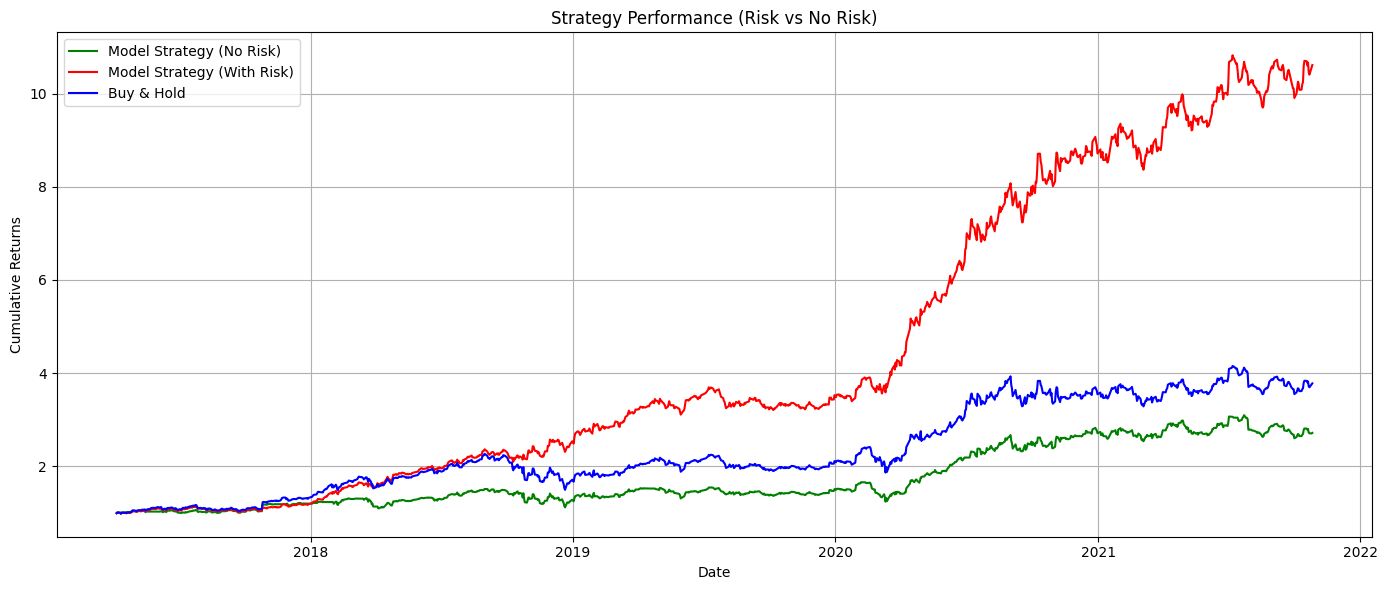

In [35]:
# Compare Strategy Performance (Risk vs. No Risk)

# Plot both strategies (with and without risk management)
plt.figure(figsize=(14, 6))
plt.plot(backtest['Date'], backtest['Cumulative_Strategy'], label='Model Strategy (No Risk)', color='green')
plt.plot(backtest['Date'], backtest['Cumulative_Strategy_with_Risk'], label='Model Strategy (With Risk)', color='red')
plt.plot(backtest['Date'], backtest['Cumulative_Market'], label='Buy & Hold', color='blue')

plt.title('Strategy Performance (Risk vs No Risk)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()